In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
dataset_train_path = '/home/nata-brain/Documents/tcc/web-eye-tracker/public/training/1685126241.2630084natanael/train_data.csv'
dataset_session_path = '/home/nata-brain/Documents/tcc/web-eye-tracker/public/sessions/1685126241.2630084natanael/session_data.csv'

raw_dataset = pd.read_csv(dataset_train_path)
session_dataset = pd.read_csv(dataset_session_path)
dataset = raw_dataset
dataset_s = session_dataset.drop(['timestamp'], axis = 1)

display(dataset_s.head())

,left_iris_x,left_iris_y,right_iris_x,right_iris_y
0,405.850555,231.186356,354.501923,228.196136
1,407.114532,231.539841,355.974915,228.950607
2,407.976379,233.015640,356.671295,229.347351
3,408.378906,232.014603,356.412415,229.194199
4,408.041260,232.819061,356.285004,229.593658


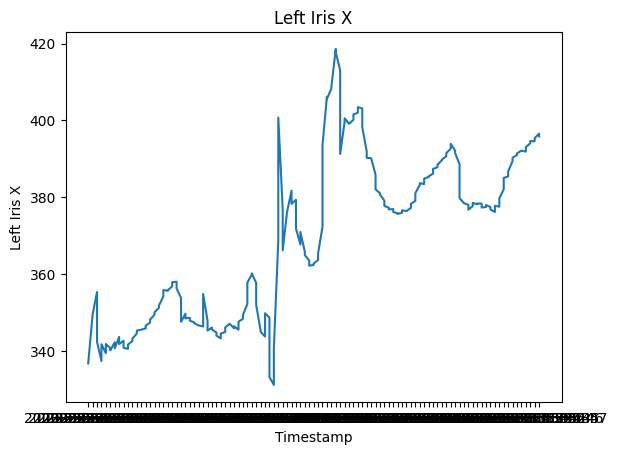

In [4]:
plt.plot(raw_dataset.timestamp, raw_dataset.left_iris_x)
plt.xlabel('Timestamp')
plt.ylabel('Left Iris X')
plt.title('Left Iris X')
plt.show()

In [5]:
print(raw_dataset.timestamp[0])

2023-5-26 15:34:5


In [6]:
from datetime import datetime
obj = datetime.strptime(raw_dataset.timestamp[0], "%Y-%m-%d %H:%M:%S")
print(obj.hour)
print(obj.minute)
print(obj.second)

15
34
5


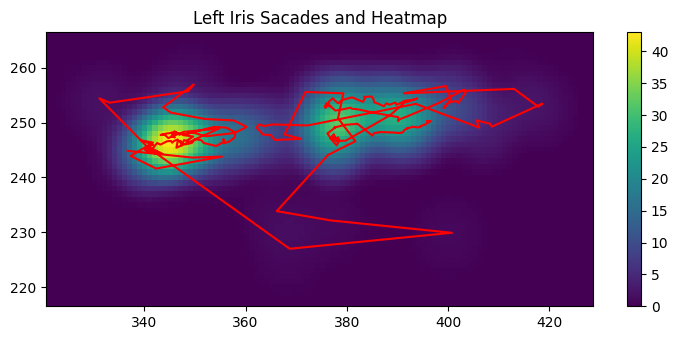

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x              = raw_dataset.left_iris_x
y              = raw_dataset.left_iris_y
datetime       = raw_dataset.timestamp
grid_size      = 1
h              = 10
x_min          = min(x)
x_max          = max(x)
y_min          = min(y)
y_max          = max(y)

x_grid         = np.arange(x_min-h, x_max+h, grid_size)
y_grid         = np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh  = np.meshgrid(x_grid,y_grid)


xc             = x_mesh+(grid_size/2)
yc             = y_mesh+(grid_size/2)

def kde_quartic(d,h):
   dn=d/h
   P=(15/16)*(1-dn**2)**2
   
   return P
 
intensity_list=[]

for j in range(len(xc)):
    
    intensity_row=[]
    
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
            
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
        
    intensity_list.append(intensity_row)
 
intensity = np.array(intensity_list)

plt.title("Left Iris Sacades and Heatmap")
plt.pcolormesh(x_mesh,y_mesh,intensity)
plt.plot(x,y,'r', linestyle = '-')
plt.colorbar()

""" i = 0

for xy in zip(x, y):
   i = i+1
   plt.annotate(f'{i}', xy)
 """
plt.show() 
 

In [10]:
display(intensity)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
import plotly.express as px

px.line(raw_dataset, y=["left_iris_x", "left_iris_y", "right_iris_x", "right_iris_y"], title="Left and Right Iris Position")
#px.line(raw_dataset, y="left_iris_y", title="Left Iris Position in Y")


In [14]:
x           = raw_dataset.left_iris_x
y           = raw_dataset.left_iris_y
datetime    = raw_dataset.timestamp

fig = px.scatter(raw_dataset, y = 'left_iris_x', x = 'timestamp', color = 'left_iris_x', symbol = 'left_iris_x')
fig.update_traces(marker_size = 10)
fig.show()